# Exploratory Data Visualisation

**The Data**

To download the dataset, head to the Federal Reserve Bank of St. Louis's [website](https://fred.stlouisfed.org/series/UNRATE/downloaddata), select 'Text, Comma Separated' as the File Format, make sure the Date Range field starts at 1948-01-01 and ends with most recent date.

<img src="/Volumes/data/projects/dataquest/files/screen.png">

In [19]:
# getting some data
import pandas as pd
unrate = pd.read_csv('/Volumes/data/projects/dataquest/data/unrate.csv')

Pandas will set the data type of the 'DATE' column as a text column. Because of how pandas reads in strings internally, this column is given a data type of **object**. We need to convert this column to the **datetime**.

In [20]:
unrate['DATE'] = pd.to_datetime(unrate['DATE'])
unrate.head(12)

,DATE,VALUE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
5,1948-06-01,3.6
6,1948-07-01,3.6
7,1948-08-01,3.9
8,1948-09-01,3.8
9,1948-10-01,3.7


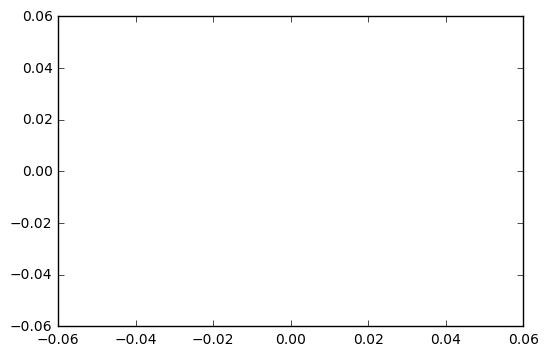

In [21]:
import matplotlib.pyplot as plt
# show empty plot
plt.plot()
plt.show()

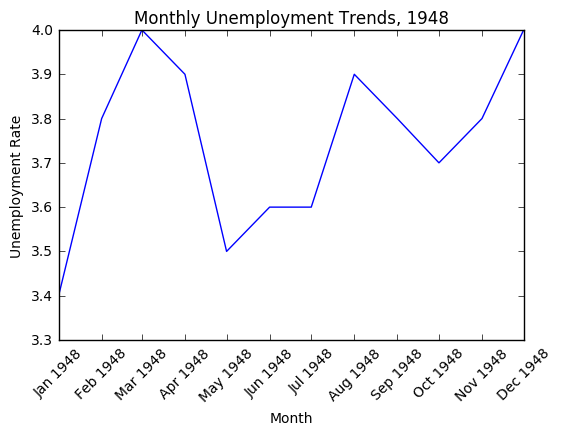

In [28]:
# show plot with data for 12 months of 1948 year
row = unrate[0:12]
plt.plot(row['DATE'],row['VALUE'])

# add ticks roration, labels and title
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Unemployment Rate")
plt.title("Monthly Unemployment Trends, 1948")

plt.show()

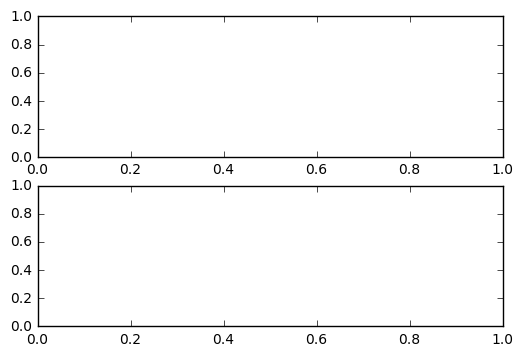

In [29]:
# creating multiple plots
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
plt.show()

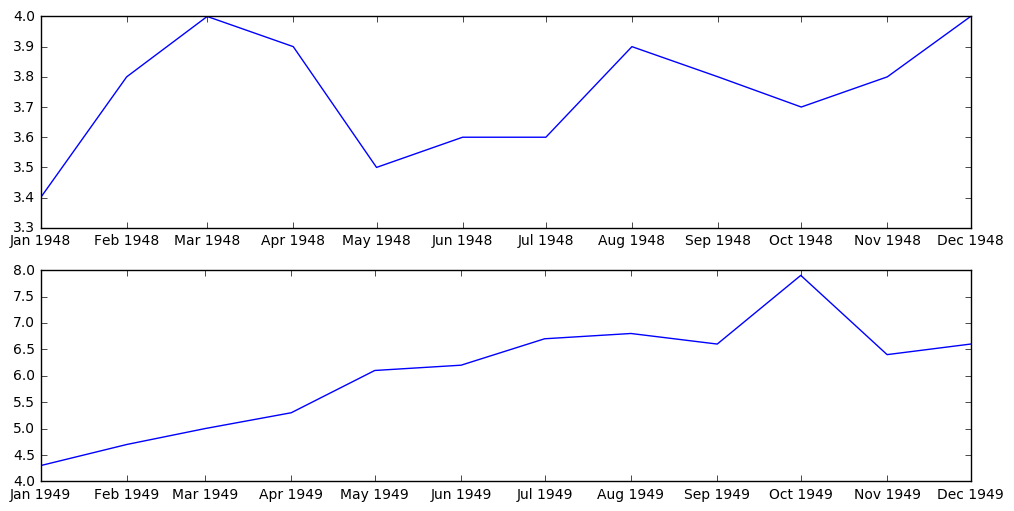

In [38]:
# now with some data for 1948 and 1949 years
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

# create plot 1
row1 = unrate[0:12]
ax1.plot(row1['DATE'],row1['VALUE'])

# create plot 2
row2 = unrate[12:24]
ax2.plot(row2['DATE'],row2['VALUE'])

plt.show()

Now let's visualize information for several years. We can do it in several ways.

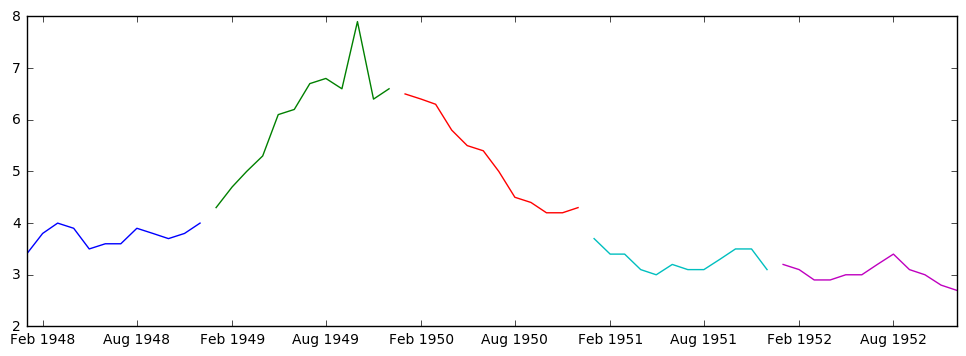

In [45]:
# option 1 - show all years in one graph
fig = plt.figure(figsize=(12,4))

# create objects
ax1 = fig.add_subplot(1,1,1)

# prepare data
year_1948 = unrate[0:12]
year_1949 = unrate[12:24]
year_1950 = unrate[24:36]
year_1951 = unrate[36:48]
year_1952 = unrate[48:60]

# create plots
ax1.plot(year_1948['DATE'],year_1948['VALUE'])
ax1.plot(year_1949['DATE'],year_1949['VALUE'])
ax1.plot(year_1950['DATE'],year_1950['VALUE'])
ax1.plot(year_1951['DATE'],year_1951['VALUE'])
ax1.plot(year_1952['DATE'],year_1952['VALUE'])

plt.show()

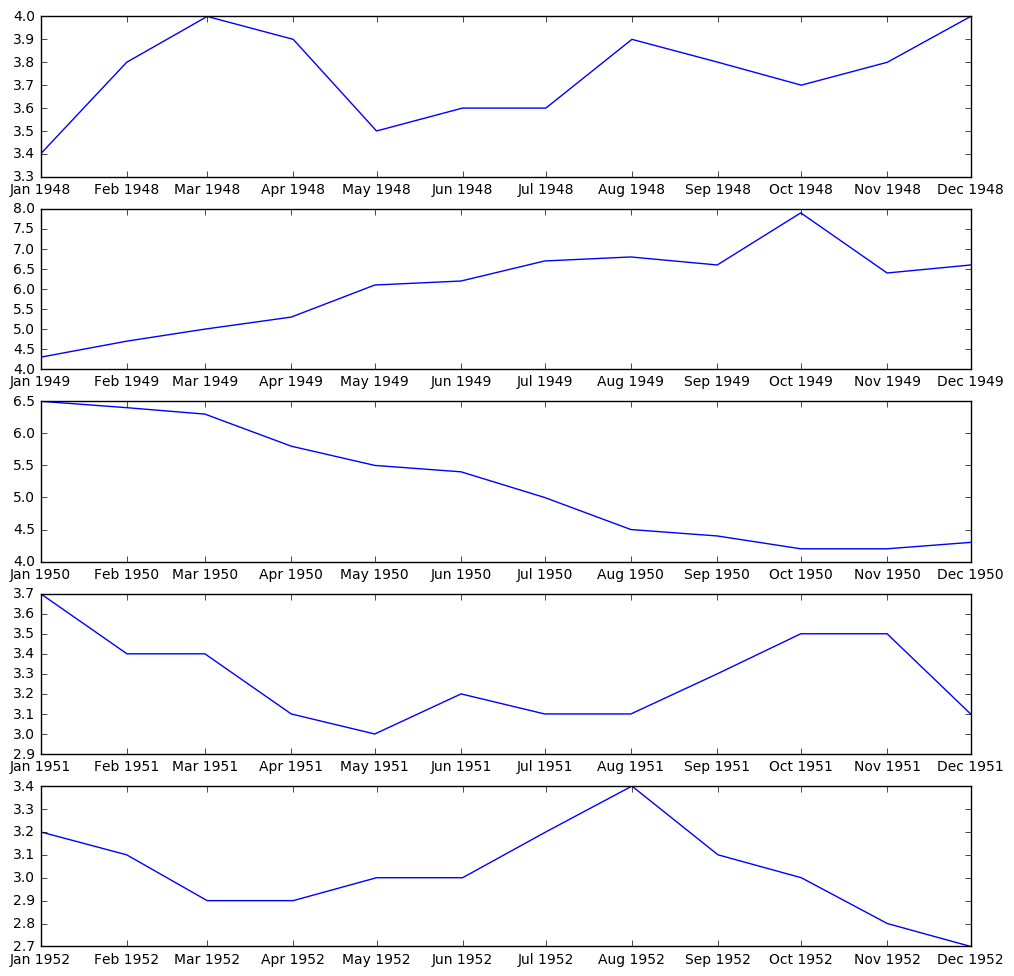

In [42]:
# option 2 - show all years in several graphs, straight way
fig = plt.figure(figsize=(12,12))

# create objects
ax1 = fig.add_subplot(5,1,1)
ax2 = fig.add_subplot(5,1,2)
ax3 = fig.add_subplot(5,1,3)
ax4 = fig.add_subplot(5,1,4)
ax5 = fig.add_subplot(5,1,5)

# prepare data
year_1948 = unrate[0:12]
year_1949 = unrate[12:24]
year_1950 = unrate[24:36]
year_1951 = unrate[36:48]
year_1952 = unrate[48:60]

# create plots
ax1.plot(year_1948['DATE'],year_1948['VALUE'])
ax2.plot(year_1949['DATE'],year_1949['VALUE'])
ax3.plot(year_1950['DATE'],year_1950['VALUE'])
ax4.plot(year_1951['DATE'],year_1951['VALUE'])
ax5.plot(year_1952['DATE'],year_1952['VALUE'])

plt.show()

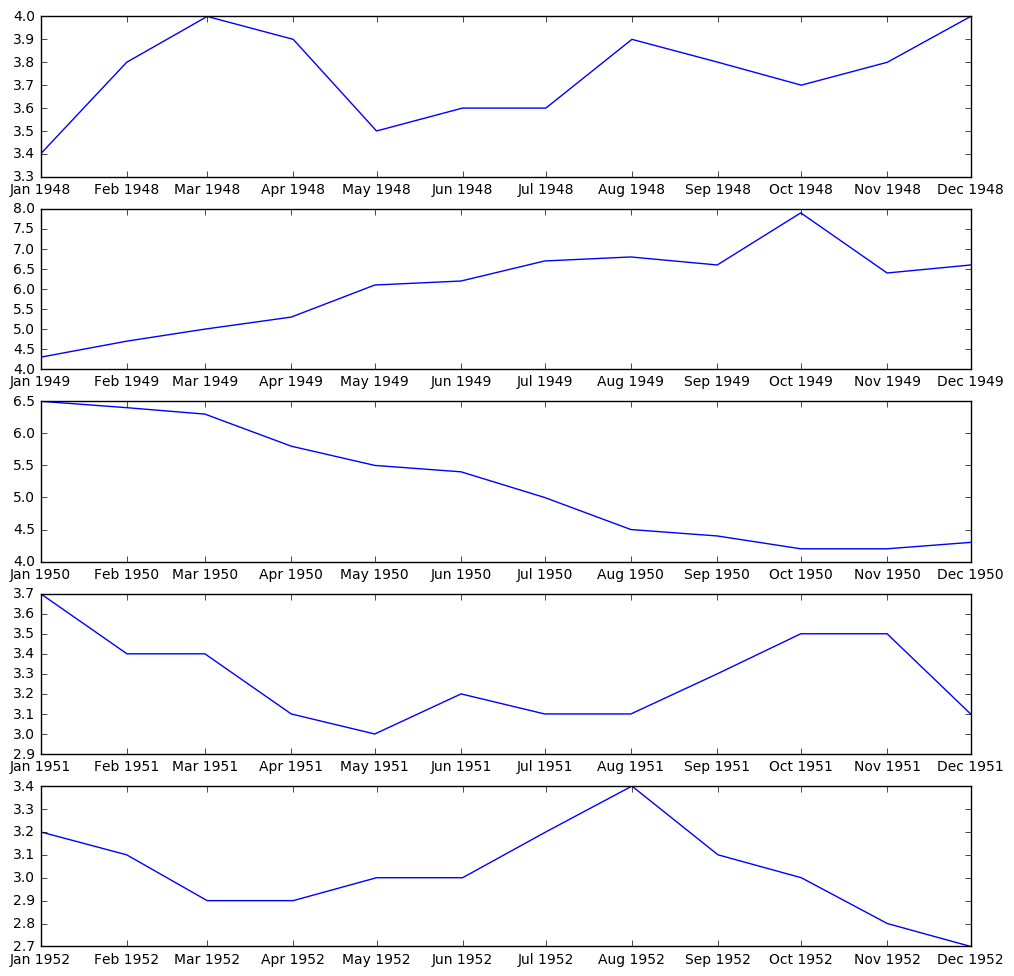

In [41]:
# option 3 - show all years in several graphs, python way
fig = plt.figure(figsize=(12,12))

for i in range(5):
    ax = fig.add_subplot(5,1,i+1)
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    ax.plot(subset['DATE'], subset['VALUE'])

plt.show()

If data points are different, i.e. YEARS, then plotting all the data into the SAME plot will show the lines one AFTER another forming long graph with one line.

If data points are similar, i.e. MONTHS, then then plotting all the data into the SAME plot will show the lines one UNDER another forming short graph with multiple lines.

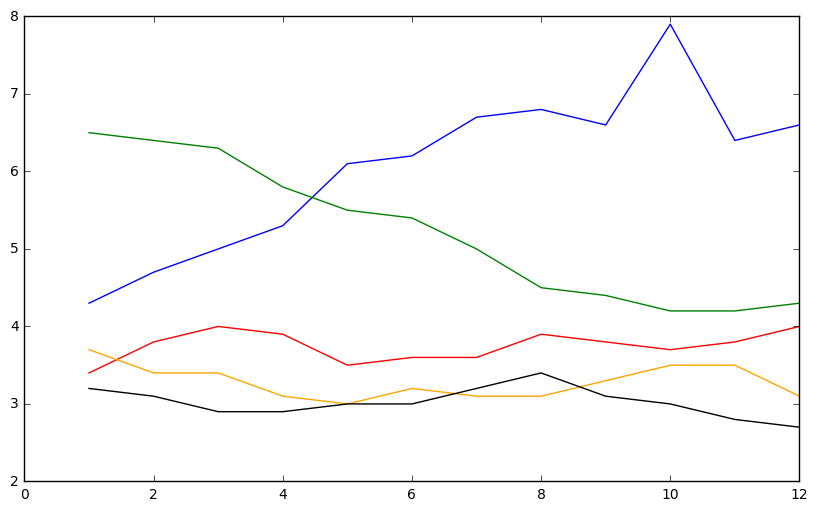

In [55]:
# Overlaying Line Charts
fig = plt.figure(figsize=(10,6))
unrate['MONTH'] = unrate['DATE'].dt.month

# prepare data
year_1948 = unrate[0:12]
year_1949 = unrate[12:24]
year_1950 = unrate[24:36]
year_1951 = unrate[36:48]
year_1952 = unrate[48:60]

# create plots and specify color
plt.plot(year_1948['MONTH'],year_1948['VALUE'], c='red')
plt.plot(year_1949['MONTH'],year_1949['VALUE'], c='blue')
plt.plot(year_1950['MONTH'],year_1950['VALUE'], c='green')
plt.plot(year_1951['MONTH'],year_1951['VALUE'], c='orange')
plt.plot(year_1952['MONTH'],year_1952['VALUE'], c='black')

plt.show()

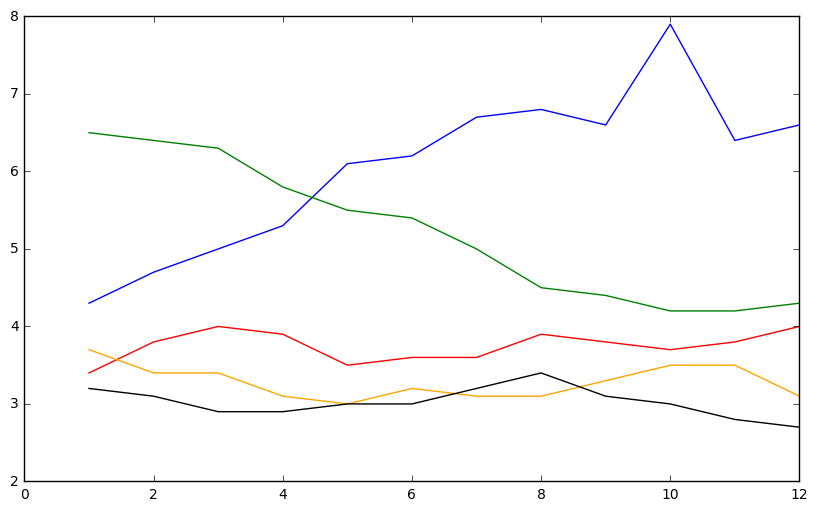

In [54]:
# same as above in pythonic way
fig = plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'orange', 'black']

for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    plt.plot(subset['MONTH'], subset['VALUE'], c=colors[i])
    
plt.show()

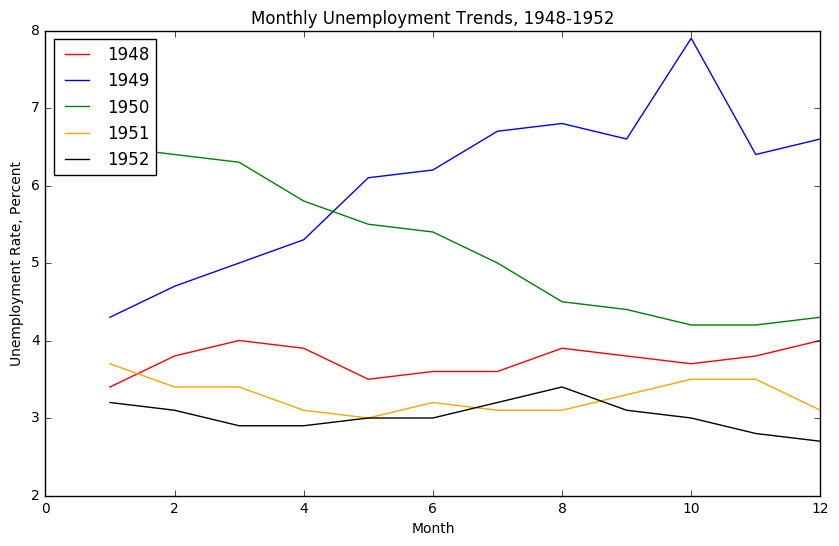

In [58]:
# now with labels and title
fig = plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'orange', 'black']

for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    label = str(1948 + i)
    plt.plot(subset['MONTH'], subset['VALUE'], c=colors[i], label=label)

plt.legend(loc='upper left')
plt.title("Monthly Unemployment Trends, 1948-1952")
plt.xlabel("Month")
plt.ylabel("Unemployment Rate, Percent")
plt.show()

## Bar Plots And Scatter Plots

In [59]:
# prepare new data set
reviews = pd.read_csv('/Volumes/data/projects/dataquest/data/fandango_scores.csv')
cols = ['FILM',
        'RT_user_norm',
        'Metacritic_user_nom', #norm is misspelled to nom
        'IMDB_norm',
        'Fandango_Ratingvalue',
        'Fandango_Stars']
norm_reviews = reviews[cols]
norm_reviews.loc[0]

FILM                    Avengers: Age of Ultron (2015)
RT_user_norm                                       4.3
Metacritic_user_nom                               3.55
IMDB_norm                                          3.9
Fandango_Ratingvalue                               4.5
Fandango_Stars                                       5
Name: 0, dtype: object

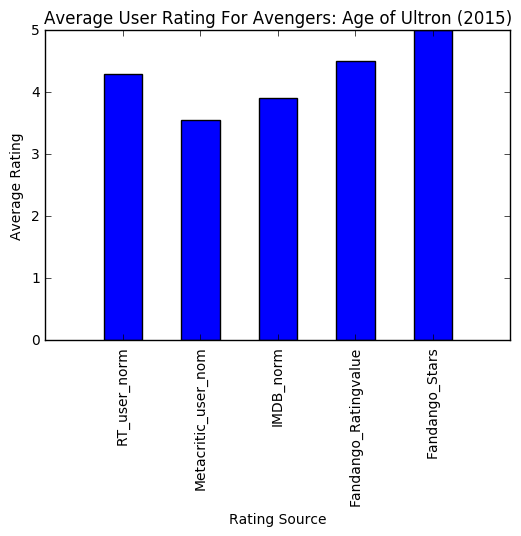

In [61]:
# create vertical bar plot
import matplotlib.pyplot as plt
from numpy import arange
num_cols = ['RT_user_norm',
           'Metacritic_user_nom',
           'IMDB_norm',
           'Fandango_Ratingvalue',
           'Fandango_Stars']

bar_heights = norm_reviews.ix[0, num_cols].values
bar_positions = arange(5) + 0.75
tick_positions = range(1,6)

fig, ax = plt.subplots()
ax.bar(bar_positions, bar_heights, width=.5)
ax.set_xticks(tick_positions)
ax.set_xticklabels(num_cols, rotation=90)
ax.set_xlabel("Rating Source")
ax.set_ylabel("Average Rating")
ax.set_title("Average User Rating For Avengers: Age of Ultron (2015)")
plt.show()

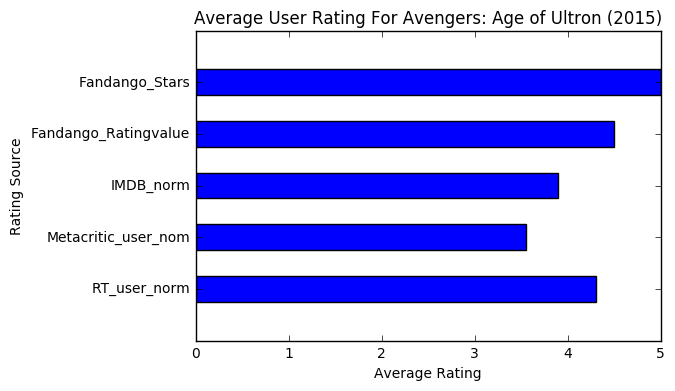

In [62]:
# create horizontal bar plot
import matplotlib.pyplot as plt
from numpy import arange
num_cols = ['RT_user_norm',
           'Metacritic_user_nom',
           'IMDB_norm',
           'Fandango_Ratingvalue',
           'Fandango_Stars']

bar_widths = norm_reviews.ix[0, num_cols].values
bar_positions = arange(5) + 0.75
tick_positions = range(1,6)

fig, ax = plt.subplots()
ax.barh(bar_positions, bar_widths, 0.5)

ax.set_yticks(tick_positions)
ax.set_yticklabels(num_cols)
ax.set_ylabel("Rating Source")
ax.set_xlabel("Average Rating")
ax.set_title("Average User Rating For Avengers: Age of Ultron (2015)")
plt.show()

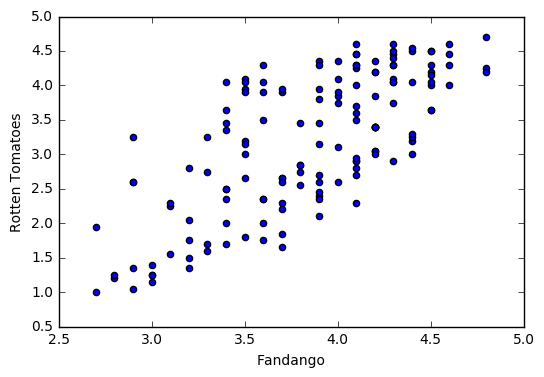

In [64]:
# create scatter plot
fig, ax = plt.subplots()
x = norm_reviews['Fandango_Ratingvalue']
y = norm_reviews['RT_user_norm']
ax.scatter(x,y)
ax.set_xlabel("Fandango")
ax.set_ylabel("Rotten Tomatoes")
plt.show()

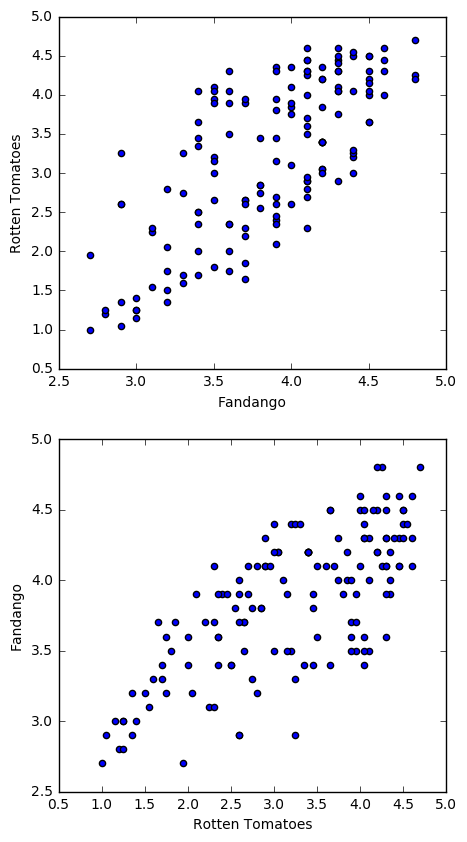

In [65]:
# just to make sure that scatters work in both directions
fig = plt.figure(figsize=(5,10))

ax1 = fig.add_subplot(2,1,1)
ax1.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['RT_user_norm'])
ax1.set_xlabel("Fandango")
ax1.set_ylabel("Rotten Tomatoes")

ax2 = fig.add_subplot(2,1,2)
ax2.scatter(norm_reviews['RT_user_norm'], norm_reviews['Fandango_Ratingvalue'])
ax2.set_xlabel("Rotten Tomatoes")
ax2.set_ylabel("Fandango")

plt.show()

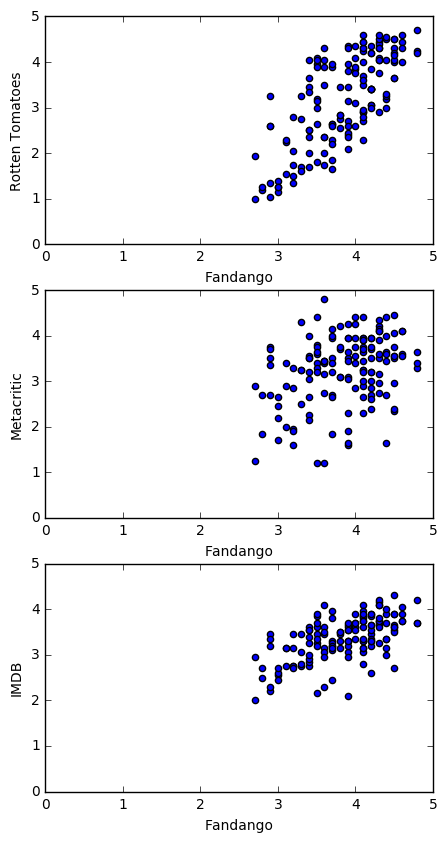

In [66]:
# let's create three scatter plots for comparison
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['RT_user_norm'])
ax1.set_xlabel("Fandango")
ax1.set_ylabel("Rotten Tomatoes")
ax1.set_xlim(0, 5)
ax1.set_ylim(0, 5)

ax2.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['Metacritic_user_nom'])
ax2.set_xlabel("Fandango")
ax2.set_ylabel("Metacritic")
ax2.set_xlim(0, 5)
ax2.set_ylim(0, 5)

ax3.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['IMDB_norm'])
ax3.set_xlabel("Fandango")
ax3.set_ylabel("IMDB")
ax3.set_xlim(0, 5)
ax3.set_ylim(0, 5)

plt.show()

**Main findings**

From the scatter plots, we can conclude that user ratings from IMDB and Fandango are the most similar. In addition, user ratings from Metacritic and Rotten Tomatoes have positive but weak correlations with user ratings from Fandango. We can also notice that user ratings from Metacritic and Rotten Tomatoes span a larger range of values than those from IMDB or Fandango. User ratings from Metacritic and Rotten Tomatoes range from 1 to 5. User ratings from Fandango range approximately from 2.5 to 5 while those from IMDB range approximately from 2 to 4.5.

## Histograms And Box Plots